Задатак: Имплементирати генетски алгоритам за решавање проблема трговачког путника. Трговачки путник треба да обиђе 8 градова ('A'- (0, 0),  'B' - (1, 2), 'C' - (3, 1), 'D' - (5, 2), 'E' - (6, 0), 'F' - (3, 7), 'G' - (2, 5), 'H' - (0, 5)), а да при томе има најкраћу путању. За решавање проблема користити рулетску селекцију родитеља, укрштање у две тачке (2, 6) и мутацију ротацијом гена са вероватноћом 0.8. Такође, обезбедити да у сваку наредну генерацију пређе 10% најбољих јединки. Величину популације поставити на 150 јединки, а број генерација нека буде 200.

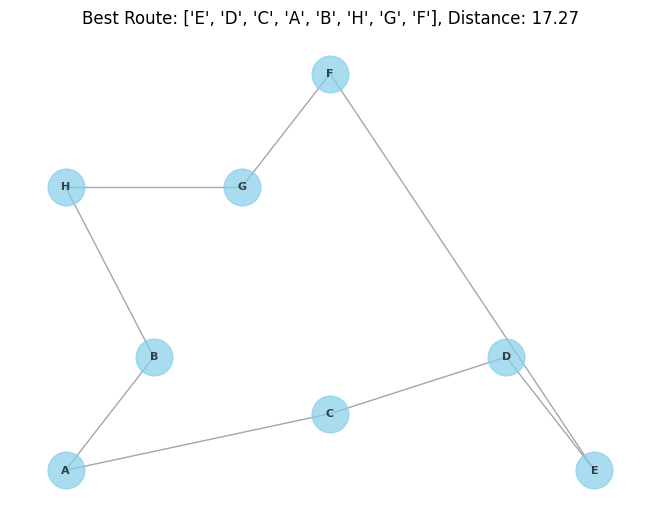

In [31]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

# Подешавања проблема
cities = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (3, 1),
    'D': (5, 2),
    'E': (6, 0),
    'F': (3, 7),
    'G': (2, 5),
    'H': (0, 5)
}

# Параметри алгоритма
population_size = 150
generations = 200
mutation_rate = 0.8
elite_size = int(population_size * 0.1)  # 10% најбољих јединки

# Функција за израчунавање удаљености путање
def calculate_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        total_distance += ((cities[city2][0] - cities[city1][0]) ** 2 +
                           (cities[city2][1] - cities[city1][1]) ** 2) ** 0.5
    return total_distance

# Генерација иницијалне популације
def generate_initial_population(size):
    cities_list = list(cities.keys())
    all_permutations = list(permutations(cities_list))
    return [list(perm) for perm in random.sample(all_permutations, size)]

# Рулетска селекција родитеља
def roulette_selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [fitness / total_fitness for fitness in fitness_scores]
    parents = random.choices(population, weights=probabilities, k=len(population))
    return [(parents[i], parents[i + 1]) for i in range(0, len(parents), 2)]

# Укрштање у две тачке
def two_point_crossover(pairs):
    children = []
    for parent1, parent2 in pairs:
        point1, point2 = 2, 6
        child1 = parent1[:point1] + [city for city in parent2 if city not in parent1[:point1] and city not in parent1[point2:]] + parent1[point2:]
        child2 = parent2[:point1] + [city for city in parent1 if city not in parent2[:point1] and city not in parent2[point2:]] + parent2[point2:]
        children.extend([child1, child2])
    return children

# Мутација ротацијом
def rotate_mutation(population):
    mutated_population = []
    for route in population:
        if random.random() < mutation_rate:
            r1 = random.randrange(0, len(route) - 1)
            r2 = random.randrange(0, len(route) - 1)
            if r1 < r2:
                mutated_population.append(route[:r1] + route[r1:r2][::-1] + route[r2:])
            else:
                mutated_population.append(route[:r2] + route[r2:r1][::-1] + route[r1:])
        else:
            mutated_population.append(route)
    return mutated_population

# Чување најбољих јединки
def preserve_elite(population, fitness_scores):
    ranked = sorted(zip(population, fitness_scores), key=lambda x: x[1])
    return [route for route, _ in ranked[:elite_size]]

# Генетски алгоритам
def genetic_algorithm():
    population = generate_initial_population(population_size)

    for generation in range(generations):
        # Израчунавање фитнес функције
        fitness_scores = [1 / calculate_distance(route) for route in population]

        # Чување најбољих јединки
        elites = preserve_elite(population, fitness_scores)

        # Селекција родитеља
        parents = roulette_selection(population, fitness_scores)

        # Укрштање и мутација
        children = two_point_crossover(parents)
        children = rotate_mutation(children)

        # Комбиновање елита и нове генерације
        population = elites + children[:population_size - elite_size]

    # Најбоље решење
    best_route = min(population, key=calculate_distance)
    best_distance = calculate_distance(best_route)

    # Цртање графа
    tsp_graph = nx.Graph()
    tsp_graph.add_nodes_from(best_route)
    tsp_graph.add_edges_from([(best_route[i], best_route[i + 1]) for i in range(len(best_route) - 1)] + [(best_route[-1], best_route[0])])
    pos = {city: cities[city] for city in tsp_graph.nodes}
    nx.draw(tsp_graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)
    plt.title(f"Best Route: {best_route}, Distance: {best_distance:.2f}")
    plt.show()

# Покретање алгоритма
genetic_algorithm()


Имплементирати генетски алгоритам за одређивање минимума McCormick функције, дефинисане као f(x,y)=sin(x+y)+(x−y)
2
 −1.5x+2.5y+1
, на интервалу (-4, 4). Користити елитизам (8%), мутацију са вероватноћом 50% и реално кодирање. Максималан број итерација подесити на 1000. Величина популације је 40.

Резултате графички представити.

Generation 1: Best = -1.46019, Avg = 10.76799, Best Chromosome = [-2.961942800878445, -2.918694974520876]
Solution found!


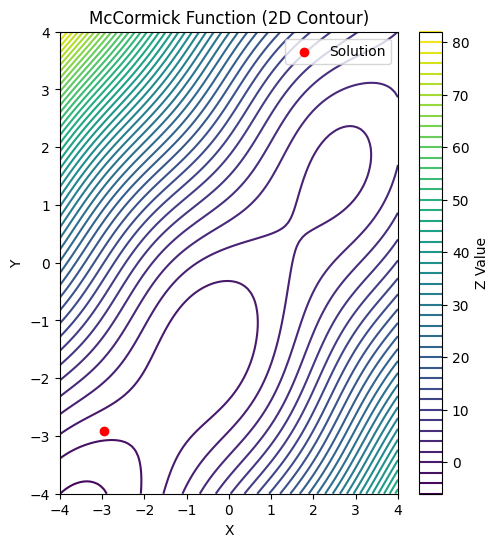

Solution coordinates: X = -2.962, Y = -2.919


In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# McCormick funkcija
def mccormick_function(chrom):
    x, y = chrom[0], chrom[1]
    return np.sin(x + y) + (x - y)**2 - 1.5 * x + 2.5 * y + 1

# Funkcija za plotovanje McCormick funkcije
def plot_mccormick(solution=None):
    x = np.linspace(-4, 4, 100)
    y = np.linspace(-4, 4, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(X + Y) + (X - Y)**2 - 1.5 * X + 2.5 * Y + 1

    fig = plt.figure(figsize=(12, 6))

    # 3D prikaz

    # 2D konture
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_title('McCormick Function (2D Contour)')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    plt.colorbar(contour, ax=ax2, label='Z Value')

    # Dodavanje rešenja na konture
    if solution:
        ax2.scatter(solution[0], solution[1], color='red', label='Solution', zorder=5)
        ax2.legend()

    plt.show()

# Generisanje početne populacije
def generate_initial_population(chrom_size, min_val, max_val, population_size):
    return np.random.uniform(min_val, max_val, (population_size, chrom_size)).tolist()

# Rangiranje jedinki
def rank_chromosomes(cost_func, chromosomes):
    costs = list(map(cost_func, chromosomes))
    ranked = sorted(zip(chromosomes, costs), key=lambda c: c[1])
    return list(zip(*ranked))

# Ruletska selekcija
def roulette_selection(ranked_population):
    weights = [len(ranked_population) - i for i in range(len(ranked_population))]
    pairs = []
    for _ in range(len(ranked_population) // 2):
        selected = random.choices(ranked_population, weights=weights, k=2)
        pairs.append(selected)
    return pairs

# Ukrštanje
def crossover(pairs):
    children = []
    for a, b in pairs:
        r = random.random()
        child1 = [r * a[i] + (1 - r) * b[i] for i in range(len(a))]
        child2 = [(1 - r) * a[i] + r * b[i] for i in range(len(a))]
        children.extend([child1, child2])
    return children

# Mutacija
def mutation(chromosomes, mutation_rate, mutation_width):
    mutated = []
    for chrom in chromosomes:
        new_chrom = [
            gene + mutation_width * 2 * (random.random() - 0.5) if random.random() < mutation_rate else gene
            for gene in chrom
        ]
        mutated.append(new_chrom)
    return mutated

# Elitizam
def elitis(ranked_old, ranked_new, elitis_rate, population_size):
    elites_count = int(population_size * elitis_rate)
    return ranked_old[:elites_count] + ranked_new[:(population_size - elites_count)]

# Genetski algoritam
def genetic(cost_func, extent, population_size, mutation_rate=0.5, elitis_rate=0.08, chrom_size=2, max_iter=1000):
    min_val, max_val = extent
    population = generate_initial_population(chrom_size, min_val, max_val, population_size)

    for iteration in range(max_iter):
        ranked_pop, costs = rank_chromosomes(cost_func, population)
        best, avg = costs[0], sum(costs) / len(costs)
        print(f"Generation {iteration+1}: Best = {best:.5f}, Avg = {avg:.5f}, Best Chromosome = {ranked_pop[0]}")

        pairs = roulette_selection(ranked_pop)
        children = crossover(pairs)
        mutated_children = mutation(children, mutation_rate, mutation_width=1)

        ranked_children, _ = rank_chromosomes(cost_func, mutated_children)
        population = elitis(ranked_pop, ranked_children, elitis_rate, population_size)

        if costs[0] < 1e-5:
            print("Solution found!")
            return ranked_pop[0]

    print("Max iterations reached.")
    return ranked_pop[0]

# Pokretanje genetskog algoritma i plotovanje rešenja
def run_and_plot():
    # Pokretanje genetskog algoritma
    solution = genetic(
        cost_func=mccormick_function,
        extent=(-4, 4),
        population_size=40,
        mutation_rate=0.5,
        elitis_rate=0.08,
        chrom_size=2,
        max_iter=1000
    )

    # Prikaz McCormick funkcije sa rešenjem
    plot_mccormick(solution=solution)
    print(f"Solution coordinates: X = {solution[0]:.3f}, Y = {solution[1]:.3f}")

# Pokretanje
run_and_plot()

Имплементирати генетски алгоритам за одређивање минимума Beale-ове функције, дефинисане као f(x,y)=(1.5−x+x⋅y)
^2
 +(2.25−x+x⋅y
^2
 )
^2
 +(2.625−x+x⋅y
^3
 )
^2
, на интервалу (-75, 75). Користити елитизам (12%), мутацију са вероватноћом 15% и реално кодирање. Максималан број итерација подесити на 200.

Резултате графички представити.



Generation 1: Best = 6007386.26737, Avg = 41557178678567.27344, Best Chromosome = [0.7172809590135927, -15.054660842686374]
Generation 2: Best = 13.48700, Avg = 8194090778.64633, Best Chromosome = [-10.326047506023972, 1.002527901327074]
Generation 3: Best = 13.48700, Avg = 1754588.20443, Best Chromosome = [-10.326047506023972, 1.002527901327074]
Generation 4: Best = 13.48700, Avg = 23373.74322, Best Chromosome = [-10.326047506023972, 1.002527901327074]
Generation 5: Best = 5.13972, Avg = 607.12560, Best Chromosome = [5.693535460545874, 0.6159426720111986]
Generation 6: Best = 0.95485, Avg = 139.88323, Best Chromosome = [-8.053794722557436, 1.0953699547289195]
Generation 7: Best = 0.01140, Avg = 33.08335, Best Chromosome = [2.7745644642154113, 0.44579124622860444]
Generation 8: Best = 0.01140, Avg = 15.36276, Best Chromosome = [2.7745644642154113, 0.44579124622860444]
Generation 9: Best = 0.01140, Avg = 11.52083, Best Chromosome = [2.7745644642154113, 0.44579124622860444]
Generation 10

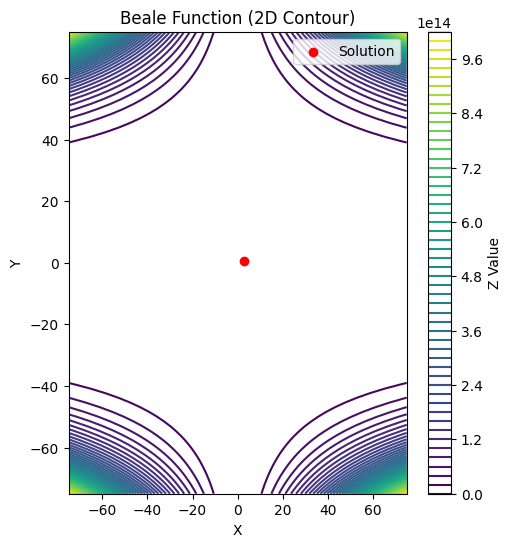

Solution coordinates: X = 2.995, Y = 0.499


In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Beale-ova funkcija
def beale_function(chrom):
    x, y = chrom[0], chrom[1]
    return (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2

# Funkcija za plotovanje Beale-ove funkcije
def plot_beale(solution=None):
    x = np.linspace(-75, 75, 100)
    y = np.linspace(-75, 75, 100)
    X, Y = np.meshgrid(x, y)
    Z = (1.5 - X + X * Y)**2 + (2.25 - X + X * Y**2)**2 + (2.625 - X + X * Y**3)**2

    fig = plt.figure(figsize=(12, 6))

    # 2D konture
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_title('Beale Function (2D Contour)')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    plt.colorbar(contour, ax=ax2, label='Z Value')

    # Dodavanje rešenja na konture
    if solution:
        ax2.scatter(solution[0], solution[1], color='red', label='Solution', zorder=5)
        ax2.legend()

    plt.show()

# Generisanje početne populacije
def generate_initial_population(chrom_size, min_val, max_val, population_size):
    return np.random.uniform(min_val, max_val, (population_size, chrom_size)).tolist()

# Rangiranje jedinki
def rank_chromosomes(cost_func, chromosomes):
    costs = list(map(cost_func, chromosomes))
    ranked = sorted(zip(chromosomes, costs), key=lambda c: c[1])
    return list(zip(*ranked))

# Ruletska selekcija
def roulette_selection(ranked_population):
    weights = [len(ranked_population) - i for i in range(len(ranked_population))]
    pairs = []
    for _ in range(len(ranked_population) // 2):
        selected = random.choices(ranked_population, weights=weights, k=2)
        pairs.append(selected)
    return pairs

# Ukrštanje
def crossover(pairs):
    children = []
    for a, b in pairs:
        r = random.random()
        child1 = [r * a[i] + (1 - r) * b[i] for i in range(len(a))]
        child2 = [(1 - r) * a[i] + r * b[i] for i in range(len(a))]
        children.extend([child1, child2])
    return children

# Mutacija
def mutation(chromosomes, mutation_rate, mutation_width):
    mutated = []
    for chrom in chromosomes:
        new_chrom = [
            gene + mutation_width * 2 * (random.random() - 0.5) if random.random() < mutation_rate else gene
            for gene in chrom
        ]
        mutated.append(new_chrom)
    return mutated

# Elitizam
def elitis(ranked_old, ranked_new, elitis_rate, population_size):
    elites_count = int(population_size * elitis_rate)
    return ranked_old[:elites_count] + ranked_new[:(population_size - elites_count)]

# Genetski algoritam
def genetic(cost_func, extent, population_size, mutation_rate=0.15, elitis_rate=0.12, chrom_size=2, max_iter=200):
    min_val, max_val = extent
    population = generate_initial_population(chrom_size, min_val, max_val, population_size)

    for iteration in range(max_iter):
        ranked_pop, costs = rank_chromosomes(cost_func, population)
        best, avg = costs[0], sum(costs) / len(costs)
        print(f"Generation {iteration+1}: Best = {best:.5f}, Avg = {avg:.5f}, Best Chromosome = {ranked_pop[0]}")

        pairs = roulette_selection(ranked_pop)
        children = crossover(pairs)
        mutated_children = mutation(children, mutation_rate, mutation_width=1)

        ranked_children, _ = rank_chromosomes(cost_func, mutated_children)
        population = elitis(ranked_pop, ranked_children, elitis_rate, population_size)

        if costs[0] < 1e-5:
            print("Solution found!")
            return ranked_pop[0]

    print("Max iterations reached.")
    return ranked_pop[0]

# Pokretanje genetskog algoritma i plotovanje rešenja
def run_and_plot():
    # Pokretanje genetskog algoritma
    solution = genetic(
        cost_func=beale_function,
        extent=(-75, 75),
        population_size=40,
        mutation_rate=0.15,
        elitis_rate=0.12,
        chrom_size=2,
        max_iter=200
    )

    # Prikaz Beale-ove funkcije sa rešenjem
    plot_beale(solution=solution)
    print(f"Solution coordinates: X = {solution[0]:.3f}, Y = {solution[1]:.3f}")

# Pokretanje
run_and_plot()


Implementirati genetski algoritam za pronalaženje minimuma RastriginLinks to an external site. funkcije. Jedinke binarno kodirati. Za odabir roditelja koristiti ruletsku selekciju, nakon čega izvršiti ukrštanje u jednoj tački. Izmena genetskog materijala potomaka izvršava se mutacijom sa inverzijom sa verovatnoćom od 15%. Implementirati i elitizam koji će omogućiti da se 7% najboljih jedinki prenese u sledeću generaciju. Veličina populacije je 50. Interval pretrage je (-5.12, 5.12). Rezultate grafički prikazati.

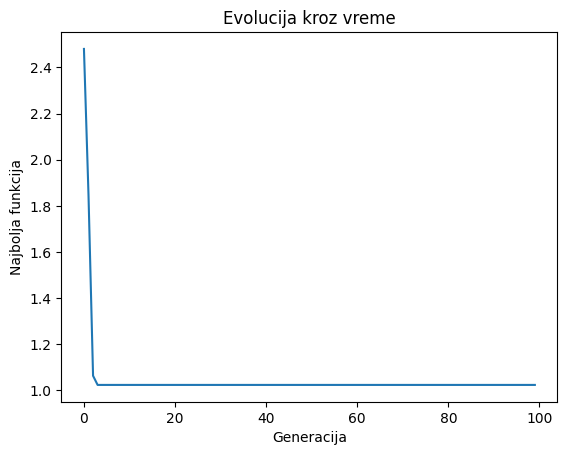

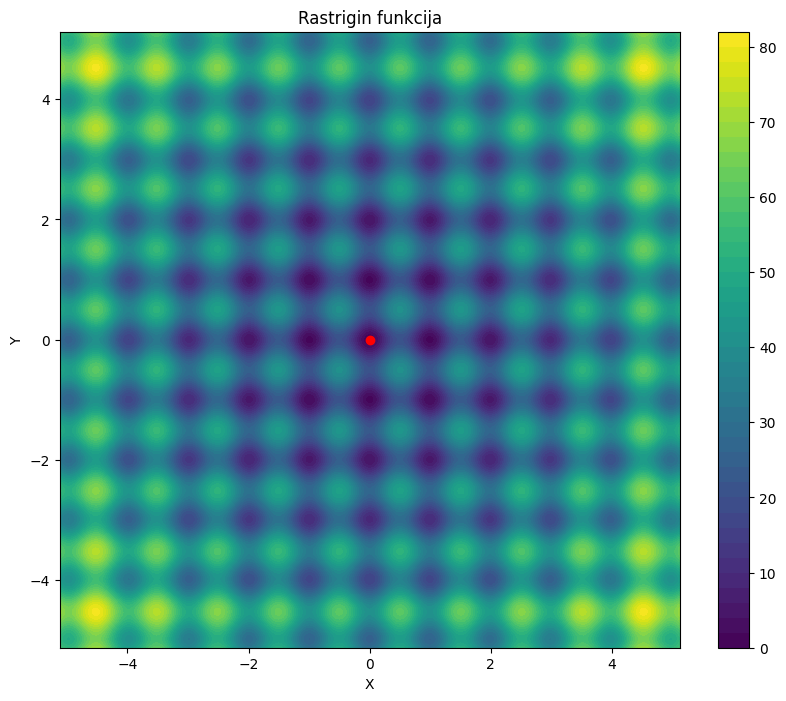

In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt, pow, sin, cos, pi

# Parametri
precision = 10
max_val = 5.12
min_val = -5.12
population_size = 50
mutation_rate = 0.15
elitism_rate = 0.07
num_generations = 100
num_variables = 2

# Rastrigin funkcija
def rastrigin(chromosome):
    A = 10
    return A * len(chromosome) + sum([x**2 - A * cos(2 * pi * x) for x in chromosome])

# Implementacija kodovanja binarne jedinke
def bin_encode(chromosome, bin_val, min_val, precision):
    ret = ""
    for g in chromosome:
        val = round((g - min_val) / bin_val)
        ret += bin(val)[2:].rjust(precision, '0')  # transformisemo u binarni broj
    return ret

def bin_encode_chromosomes(chromosomes, precision, max_val, min_val):
    bin_val = (max_val - min_val) / (2**precision - 1)  # nivo diskretizacije
    bin_chromosomes = [bin_encode(c, bin_val, min_val, precision) for c in chromosomes]
    return bin_chromosomes

def bin_decode(chromosome, bin_val, min_val, precision):
    ret = []
    for idx in range(0, len(chromosome), precision):
        g = int(chromosome[idx:idx + precision], 2)
        ret.append(g * bin_val + min_val)
    return ret

def bin_decode_chromosomes(chromosomes, precision, max_val, min_val):
    bin_val = (max_val - min_val) / (2**precision - 1)
    bin_chromosomes = [bin_decode(c, bin_val, min_val, precision) for c in chromosomes]
    return bin_chromosomes

# Ruletska selekcija
def rank_chromosomes(cost, chromosomes):
    costs = list(map(cost, chromosomes))
    ranked = sorted(list(zip(chromosomes, costs)), key=lambda c: c[1])
    # Vraćamo samo listu jedinki, bez vrednosti funkcije
    return [chromosome for chromosome, _ in ranked]

def roulette_selection(ranked_population_list):
    pairs = []
    i = 0
    for i in range(0, len(ranked_population_list), 2):
        weights = []
        for i in range(len(ranked_population_list)):
            weights.append((len(ranked_population_list) - i) * random.random())  # rang jedinke mnozi se nasumicnim brojem
        maxInd1, maxInd2 = (0, 1) if weights[0] >= weights[1] else (1, 0)
        for i in range(2, len(ranked_population_list)):
            if weights[i] > weights[maxInd1]:
                maxInd2 = maxInd1
                maxInd1 = i
            elif weights[i] > weights[maxInd2]:
                maxInd2 = i
        pairs.append([ranked_population_list[maxInd1], ranked_population_list[maxInd2]])
    return pairs

# Mutacija inverzijom
def mutation_inv(chromosomes, mutation_rate):
    mutated_chromosomes = []
    for chromosome in chromosomes:
        if random.random() < mutation_rate:
            r1 = random.randrange(0, len(chromosome) - 1)
            mutated_chromosomes.append(chromosome[:r1] + str(1 - int(chromosome[r1])) + chromosome[r1 + 1:])
        else:
            mutated_chromosomes.append(chromosome)
    return mutated_chromosomes

# Elitizam
def elitis(chromosomes_old, chromosomes_new, elitis_rate, population_size):
    old_ind_size = int(np.round(population_size * elitis_rate))
    # Kombinujemo najbolje jedinke iz starog i novog skupa
    return chromosomes_old[:old_ind_size] + chromosomes_new[:(population_size - old_ind_size)]

# Inicijalizacija populacije
population = np.random.uniform(min_val, max_val, (population_size, num_variables))

# Binarno kodiranje populacije
bin_population = bin_encode_chromosomes(population, precision, max_val, min_val)

# Glavna petlja
best_scores = []
for generation in range(num_generations):
    ranked_population_list = rank_chromosomes(lambda chrom: rastrigin(bin_decode_chromosomes([chrom], precision, max_val, min_val)[0]), bin_population)
    selected_pairs = roulette_selection(ranked_population_list)

    offspring = []
    for pair in selected_pairs:
        parent1, parent2 = pair
        crossover_point = random.randint(1, len(parent1) - 1)
        offspring.append(parent1[:crossover_point] + parent2[crossover_point:])
        offspring.append(parent2[:crossover_point] + parent1[crossover_point:])

    mutated_offspring = mutation_inv(offspring, mutation_rate)

    bin_population = elitis(ranked_population_list, mutated_offspring, elitism_rate, population_size)

    real_population = bin_decode_chromosomes(bin_population, precision, max_val, min_val)

    best_scores.append(min([rastrigin(ind) for ind in real_population]))


plt.plot(best_scores)
plt.xlabel("Generacija")
plt.ylabel("Najbolja funkcija")
plt.title("Evolucija kroz vreme")
plt.show()


# Ispravljena definicija Rastrigin funkcije koja radi sa nizovima
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Funkcija za generisanje mreže vrednosti funkcije Rastrigin u 2D
def plot_rastrigin_2d():
    x = np.linspace(-5.12, 5.12, 400)
    y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(x, y)
    Z = rastrigin(X, Y)  # Izračunavamo vrednosti funkcije Rastrigin na mreži

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    cp = ax.contourf(X, Y, Z, 50, cmap='viridis')
    fig.colorbar(cp)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Rastrigin funkcija')

    # Prikaz minimuma (0, 0)
    ax.plot(0, 0, 'ro')  # Obeležavamo minimum crvenom tačkom
    plt.show()

plot_rastrigin_2d()

Implementirati genetski algoritam za pronalaženje minimuma Griwank (Links to an external site.) funkcije. Jedinke binarno kodirati. Za odabir roditelja koristiti ruletsku selekciju, nakon čega izvršiti ukrštanje u jednoj tački. Izmena genetskog materijala potomaka izvršava se mutacijom sa rotacijom sa verovatnoćom od 10%. Implementirati i elitizam koji će omogućiti da se 8% najboljih jedinki prenese u sledeću generaciju. Veličina populacije je 50. Interval pretrage je (-5,5). Rezultate grafički prikazati.

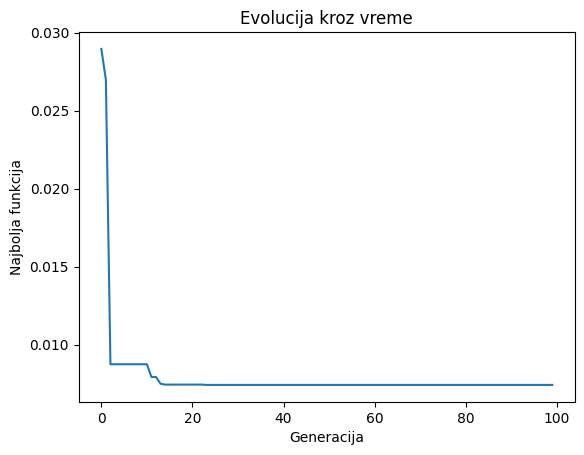

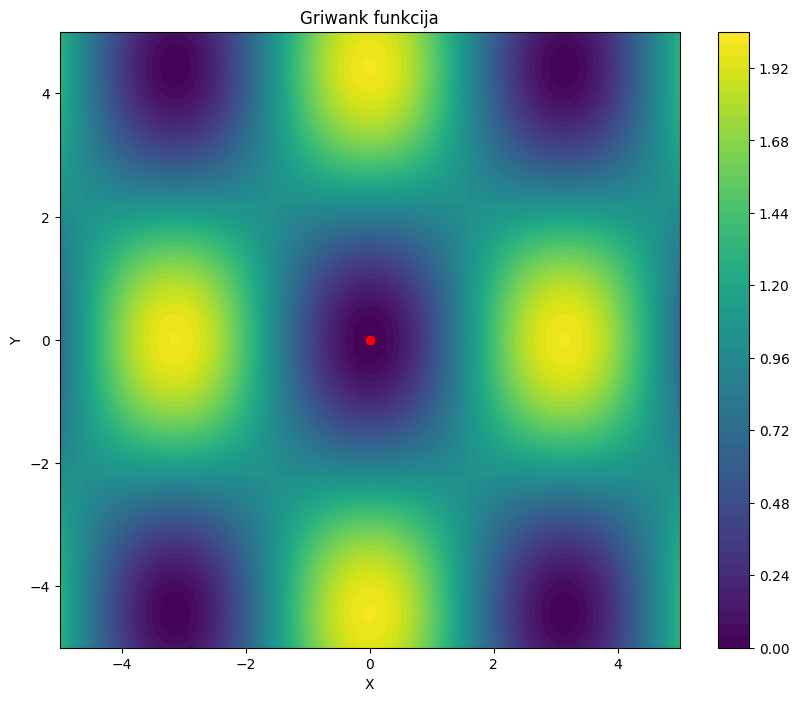

In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt, cos, pi

# Parametri
precision = 10
max_val = 5.0
min_val = -5.0
population_size = 50
mutation_rate = 0.10  # Mutacija sa rotacijom
elitism_rate = 0.08  # 8% elitizma
num_generations = 100
num_variables = 2

# Griwank funkcija - ažurirana za rad sa mrežama
def griwank(X, Y):
    sum_term = (X**2 + Y**2) / 4000
    prod_term = np.cos(X / np.sqrt(1)) * np.cos(Y / np.sqrt(2))
    return 1 + sum_term - prod_term

# Implementacija kodovanja binarne jedinke
def bin_encode(chromosome, bin_val, min_val, precision):
    ret = ""
    for g in chromosome:
        val = round((g - min_val) / bin_val)
        ret += bin(val)[2:].rjust(precision, '0')  # Transformišemo u binarni broj
    return ret

def bin_encode_chromosomes(chromosomes, precision, max_val, min_val):
    bin_val = (max_val - min_val) / (2**precision - 1)  # Nivo diskretizacije
    bin_chromosomes = [bin_encode(c, bin_val, min_val, precision) for c in chromosomes]
    return bin_chromosomes

def bin_decode(chromosome, bin_val, min_val, precision):
    ret = []
    for idx in range(0, len(chromosome), precision):
        g = int(chromosome[idx:idx + precision], 2)
        ret.append(g * bin_val + min_val)
    return ret

def bin_decode_chromosomes(chromosomes, precision, max_val, min_val):
    bin_val = (max_val - min_val) / (2**precision - 1)
    bin_chromosomes = [bin_decode(c, bin_val, min_val, precision) for c in chromosomes]
    return bin_chromosomes

# Ruletska selekcija
def rank_chromosomes(cost, chromosomes):
    costs = list(map(cost, chromosomes))
    ranked = sorted(list(zip(chromosomes, costs)), key=lambda c: c[1])
    return [chromosome for chromosome, _ in ranked]

def roulette_selection(ranked_population_list):
    pairs = []
    for i in range(0, len(ranked_population_list), 2):
        weights = []
        for i in range(len(ranked_population_list)):
            weights.append((len(ranked_population_list) - i) * random.random())  # Rang jedinke množi se nasumičnim brojem
        maxInd1, maxInd2 = (0, 1) if weights[0] >= weights[1] else (1, 0)
        for i in range(2, len(ranked_population_list)):
            if weights[i] > weights[maxInd1]:
                maxInd2 = maxInd1
                maxInd1 = i
            elif weights[i] > weights[maxInd2]:
                maxInd2 = i
        pairs.append([ranked_population_list[maxInd1], ranked_population_list[maxInd2]])
    return pairs

# Mutacija sa rotacijom
def mutation_rotate(chromosomes, mutation_rate):
    mutated_chromosomes = []
    for chromosome in chromosomes:
        if random.random() < mutation_rate:
            r1 = random.randint(0, len(chromosome) - 1)
            mutated_chromosomes.append(chromosome[:r1] + str(1 - int(chromosome[r1])) + chromosome[r1 + 1:])
        else:
            mutated_chromosomes.append(chromosome)
    return mutated_chromosomes

# Elitizam
def elitis(chromosomes_old, chromosomes_new, elitism_rate, population_size):
    old_ind_size = int(np.round(population_size * elitism_rate))
    return chromosomes_old[:old_ind_size] + chromosomes_new[:(population_size - old_ind_size)]

# Inicijalizacija populacije
population = np.random.uniform(min_val, max_val, (population_size, num_variables))

# Binarno kodiranje populacije
bin_population = bin_encode_chromosomes(population, precision, max_val, min_val)

# Glavna petlja
best_scores = []
for generation in range(num_generations):
    ranked_population_list = rank_chromosomes(lambda chrom: griwank(*bin_decode_chromosomes([chrom], precision, max_val, min_val)[0]), bin_population)
    selected_pairs = roulette_selection(ranked_population_list)

    offspring = []
    for pair in selected_pairs:
        parent1, parent2 = pair
        crossover_point = random.randint(1, len(parent1) - 1)
        offspring.append(parent1[:crossover_point] + parent2[crossover_point:])
        offspring.append(parent2[:crossover_point] + parent1[crossover_point:])

    mutated_offspring = mutation_rotate(offspring, mutation_rate)

    bin_population = elitis(ranked_population_list, mutated_offspring, elitism_rate, population_size)

    real_population = bin_decode_chromosomes(bin_population, precision, max_val, min_val)

    best_scores.append(min([griwank(*ind) for ind in real_population]))

# Prikazivanje rezultata
plt.plot(best_scores)
plt.xlabel("Generacija")
plt.ylabel("Najbolja funkcija")
plt.title("Evolucija kroz vreme")
plt.show()

# Vizualizacija Griwank funkcije u 2D
def plot_griwank_2d():
    x = np.linspace(-5.0, 5.0, 400)
    y = np.linspace(-5.0, 5.0, 400)
    X, Y = np.meshgrid(x, y)
    Z = griwank(X, Y)  # Izračunavamo vrednosti funkcije Griwank na mreži

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    cp = ax.contourf(X, Y, Z, 50, cmap='viridis')
    fig.colorbar(cp)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Griwank funkcija')

    # Prikaz minimuma (0, 0)
    ax.plot(0, 0, 'ro')  # Obeležavamo minimum crvenom tačkom
    plt.show()

plot_griwank_2d()


GRUPA 3 RTRK JOB SHOP

Имплементирати генетски алгоритам за решавање проблема распоређивања послова (Job Shop). Систем се састоји од 3 посла, а сваки посао чине 4 операција које се извршавају на 4 машине. Време извршавања и секвенца машина на којима се операције иѕвршавају задате су табелама:



Посао	Операција 1	Операција 2	Операција 3	Операција 4
Посао 1	1	3	2	4
Посао 2	2	4	1	3
Посао 3	4	1	2	3


Посао	Операција 1	Операција 2	Операција 3	Операција 4
Посао 1	6	2	8	11
Посао 2	3	4	12	7
Посао 3	5	6	9	1




Генерисати иницијалну популацију тако да кодирање јединки буде у складу са задатим проблемом. Величину популације поставити на 200. Имплементирати рулетксу селекцију и адекватан оператор укрштања, као и оператор мутације ротрањем послова. Максимални број генерација је 100, а вероватноћа мутације 0.7. Обезбедити да се у свакој генерацији чува 20 најбољих јединки.

optimal sequence [4, 3, 3, 4, 2, 3, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 4, 1, 3, 3, 0, 4, 4, 0, 2, 3, 1, 4]
optimal value:60.000000




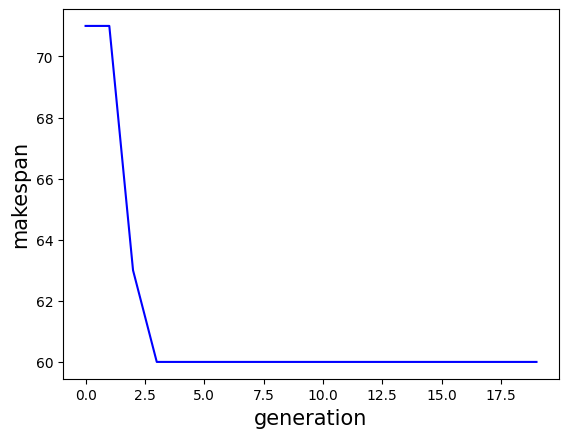

In [56]:
import numpy as np
import random
import copy
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Inicijalni podaci
process_time = np.array([[1, 3, 2, 4], [2, 4, 1, 3], [4, 1, 2, 3]])  # Vreme izvršavanja operacija
machine_sequence = np.array([[6, 2, 8, 11], [3, 4, 12, 7], [5, 6, 9, 1]])  # Mašine na kojima se izvršavaju operacije

num_jobs = process_time.shape[0]
num_operations = process_time.shape[1]
num_machines = np.max(machine_sequence)

# Generisanje početne populacije
def generate_initial_population(num_job, num_mach, population_size):
    population_list=[]
    job=[]
    for i in range(population_size):
        jobs_i=[]
        for j in range(num_job):
            job=[j]*num_mach
            jobs_i.extend(job)
            jobs=list(np.random.permutation(jobs_i))
        population_list.append(jobs)
    return population_list

# implmenetacija funkcije za iscrtavanje Gantograma
def plot_ganttogram(chromosome, process_time, machine_sequence):
    num_jobs = len(process_time)
    num_operations = process_time.shape[1]

    # Priprema za čuvanje vremena početka i kraja za svaki posao i operaciju
    job_end_times = {j: 0 for j in range(num_jobs)}  # Završetak poslednje operacije svakog posla
    machine_end_times = {m: 0 for m in set(machine_sequence.flatten())}  # Završetak na svakoj mašini
    operation_counters = {j: 0 for j in range(num_jobs)}  # Broj operacija za svaki posao

    # Čuvanje informacija za Ganttov dijagram
    gantt_data = []

    for gene in chromosome:
        job = gene  # Posao (numerisan od 0)
        operation = operation_counters[job]  # Indeks operacije (počinje od 0)
        machine = machine_sequence[job, operation]  # Mašina koja radi tu operaciju
        duration = process_time[job, operation]  # Trajanje operacije

        # Početno vreme za operaciju
        start_time = max(job_end_times[job], machine_end_times[machine])
        end_time = start_time + duration

        # Ažuriranje vremena završetka
        job_end_times[job] = end_time
        machine_end_times[machine] = end_time

        # Ažuriranje broja operacija
        operation_counters[job] += 1

        # Čuvanje za Ganttov dijagram
        gantt_data.append((machine, start_time, end_time, job, operation))

    # Crtanje Ganttovog dijagrama
    fig, ax = plt.subplots(figsize=(10, 6))

    for entry in gantt_data:
        machine, start, end, job, op = entry
        ax.barh(machine, end - start, left=start, edgecolor='black', label=f"Job {job}, Op {op}")
        ax.text(start + (end - start) / 2, machine, f"J{job}-O{op}", va='center', ha='center', color='white')

    ax.set_xlabel("Vreme")
    ax.set_ylabel("Masine")
    ax.set_title("Gantogram")
    ax.set_yticks(sorted(machine_end_times.keys()))
    ax.set_yticklabels([f"Masina {m}" for m in sorted(machine_end_times.keys())])
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.xaxis.set_major_locator(MultipleLocator(2))

    plt.tight_layout()
    plt.show()

def makespan(chromosomes, population_size, num_jobs, process_time, num_machines, machine_sequence): #process_time i machine_sequnce predtavljaju matrice koje sadrze informacije masiniama na kojima se operacije izvrsavaju i vremenu izvrsavanja

    chrom_fitness, chrom_fit=[],[]
    for pop_size in range(population_size):
        j_keys=[j for j in range(num_jobs)]
        key_count={key:0 for key in j_keys}
        j_count = {key:0 for key in j_keys}
        m_keys = np.unique(machine_sequence)
        m_count = {key: 0 for key in m_keys}
        for i in chromosomes[pop_size]:
            get_time=int(process_time[i][key_count[i]])
            gen_mach = int(machine_sequence[i][key_count[i]])
            j_count[i]=j_count[i]+get_time
            m_count[gen_mach]=m_count[gen_mach]+get_time
            if m_count[gen_mach] < j_count[i]:
                    m_count[gen_mach] = j_count[i]
            elif m_count[gen_mach] > j_count[i]:
                    j_count[i] = m_count[gen_mach]

            key_count[i] = key_count[i] + 1

        makespan = max(j_count.values())
        chrom_fitness.append(1/makespan)
        chrom_fit.append(makespan)


    return chrom_fit, chrom_fitness



 # implemntacija rangiranja jedinki i ruletske selekcije
def cost_func(chromosomes, population_size, num_job, process_time, num_machine, machine_sequence,):
    chrom_fit, chrom_fitness=makespan(chromosomes, population_size, num_job, process_time, num_machine, machine_sequence)
    return chrom_fitness, chrom_fit

def rank(cost, chromosomes, population_size, num_job, process_time, num_machine, machine_sequence, population_list):
    costs, chrom_fit = cost_func(chromosomes, population_size, num_job, process_time, num_machine, machine_sequence)
    ranked = sorted(list(zip(chromosomes, costs, chrom_fit, population_list)), key=lambda c: c[2])
    ranked_chrom, ranked_costs, ranked_chrom_fit, ranked_population_list = list(zip(*ranked))
    ranked_chrom = list(ranked_chrom)
    ranked_chrom_fit = list(ranked_chrom_fit)
    return ranked_chrom, ranked_costs, ranked_chrom_fit

def natural_selection(ranked_parents, n):
    return ranked_parents[:n]

def roulette_selection(parents):

  pairs = []
  i = 0
  for i in range(0, len(parents), 2):
    weights=[];
    for i in range(len(parents)):
        weights.append((len(parents)-i)*random.random())
    if (weights[0]>=weights[1]):
        maxInd1=0;
        maxInd2=1;
    else:
        maxInd1=1;
        maxInd2=0;

    for i in range(2,len(parents)):
        if weights[i]>weights[maxInd1]:
            maxInd2=maxInd1
            maxInd1=i
        elif weights[i]>weights[maxInd2]:
            maxInd2=1
    pairs.append([parents[maxInd1], parents[maxInd2]])

  return pairs

def crossover(pairs, num_job):
    children=[]
    set=list(range(num_job)) # skup s
    for a,b in pairs: # roditeljske jedinke a i b
        child1=[-1]*len(a)
        child2=[-1]*len(b)
        temp_a=[]
        temp_b=[]
        m=0
        k=0
        parent1=copy.deepcopy(a)
        parent2=copy.deepcopy(b)
        r1= random.randrange(1,num_job-1)
        set1=set[:r1] # skup s1
        set2=set[r1:] # skup s2
        for i in range(len(a)):
            if a[i] in set1: # ukoliko je i-ti gen roditeljske jedinke a iz skupa s1 preslikava se na i-tu poziciju prve potomacke jedinke
                child1[i]=a[i]
                temp_a.append(a[i])
        for j in range(len(b)):
            if b[j] in set2: # ukoliko je i-ti gen roditeljske jedinke b iz skupa s1 preslikava se na i-tu poziciju druge potomacke jedinke
                child2[j]=b[j]
                temp_b.append(b[j])
        for l in range(len(child1)):
            if child1[l]==-1:
                child1[l]=temp_b[m]
                m+=1
        for f in range(len(child2)):
            if child2[f]==-1:
                child2[f]=temp_a[k]
                k+=1

        children.append(child1)
        children.append(child2)
    return children


# implementacija mutacije rotacijom poslova
def mutation(population_list,mutation_rate):
    mutated_population=[]
    for chromosome in population_list:
        r=random.random();
        mutated_chrom=[]
        if r<mutation_rate:
            r1=random.randrange(0,len(chromosome))
            r2=random.randrange(0,len(chromosome))
            mutated_chrom=chromosome
            mutated_chrom[r1],mutated_chrom[r2]=mutated_chrom[r2],mutated_chrom[r1]
            mutated_population.append(mutated_chrom)
        else:
            mutated_population.append(chromosome)
    return mutated_population


def elitis(ranked_parenst, ranked_children, elitis_rate, population_size):
    old_ind_size=int(np.round(population_size*elitis_rate))
    return ranked_parenst[:old_ind_size]+ranked_children[:(population_size-old_ind_size)]



def job_schedule(cost_func, population_size = 5, elitis_rate=0.1, mutation_rate=0.2, num_iteration = 20):
    makespan_record=[]
    machine_sequence = np.array([[3,1,2,4,6,5],[2,3,5,6,1,4], [3,4,6,1,2,5],[2,1,3,4,5,6],[3,2,5,6,1,4]])
    process_time = np.array([[1,3,6,7,3,6],[8,5,10,10,10,4],[5,4,8,9,1,7],[5,5,5,3,8,9],[3,3,9,10,4,1]])

    num_job,num_machine=process_time.shape

    avg_list=[]
    Tbest=math.inf
    same=0

    population_list=generate_initial_population(num_job, num_machine ,population_size)
    chromosomes=population_list

    for iteration in range(num_iteration):
        Tbest_now = math.inf

        parents, costs, chrom_fit=rank(cost_func,chromosomes, population_size, num_job, process_time, num_machine, machine_sequence, population_list)

        pairs=roulette_selection(parents)

        offspring_list= crossover(pairs, num_job)

        offspring_list=mutation(offspring_list,mutation_rate)

        #offspring_list=inverse_mutation(offspring_list,inverse_mutation_rate)

        ranked_children,costs_children,chrom_fit_children=rank(cost_func,offspring_list,population_size,num_job,process_time,num_machine,machine_sequence,population_list)

        chromosomes=elitis(parents,ranked_children,elitis_rate,population_size)


        for pop_size in range(population_size):
            if chrom_fit[pop_size] < Tbest_now:
                Tbest_now = chrom_fit[pop_size]
                sequence_now = copy.deepcopy(chromosomes[pop_size])
        if Tbest_now < Tbest:
            Tbest = Tbest_now
            sequence_best = copy.deepcopy(sequence_now)
        if Tbest_now==Tbest:
            same+=1
        if same>15:
            break
        makespan_record.append(Tbest)

    print("optimal sequence", sequence_best)
    print("optimal value:%f"%Tbest)
    print("\n")

    plt.plot([i for i in range(len(makespan_record))],makespan_record,'b')
    plt.ylabel('makespan', fontsize=15)
    plt.xlabel('generation', fontsize=15)
    plt.show()

    return Tbest

schedule = job_schedule(cost_func)

